# Семинар 2 - pandas, linear regression

In [3]:
import numpy as np

## 1. Pandas
![alt text](https://media0.giphy.com/media/fAaBpMgGuyf96/giphy.gif)

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле ["math_students.csv"](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/practicals/math_students.csv). 

 Целевой переменной является итоговая оценка студента за курс.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# магическая функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

In [2]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

 ---

 Для вывода названий всех признаков есть специальная функция:

In [5]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

 Как обращаться к колонкам?
* "dot" `data.G3` 
* "brackets" `data['G3']`. 
* "list in the bracket" `data[['G3', 'G2']]` 
* "index" `data.iloc[:, -1]`


In [9]:
data.G3

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [10]:
data['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [11]:
data[['G3', 'G2']]

,G3,G2
0,6,6
1,6,5
2,10,8
3,15,14
4,10,10
...,...,...
390,9,9
391,16,16
392,7,8
393,10,12


In [14]:
data.iloc[:10, 2:10]

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob
0,18,U,GT3,A,4,4,at_home,teacher
1,17,U,GT3,T,1,1,at_home,other
2,15,U,LE3,T,1,1,at_home,other
3,15,U,GT3,T,4,2,health,services
4,16,U,GT3,T,3,3,other,other
5,16,U,LE3,T,4,3,services,other
6,16,U,LE3,T,2,2,other,other
7,17,U,GT3,A,4,4,other,teacher
8,15,U,LE3,A,3,2,services,other
9,15,U,GT3,T,3,4,other,other


---
**Задание 1**  Отделить от признаков целевую переменную. Создать вектор `y` и таблицу `X`

In [19]:
data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [17]:
# YOUR CODE HERE
X = data[data.columns[:-1]]
y = data.G3

In [18]:
print(X.shape)
print(y.shape)

(395, 32)
(395,)


А теперь тоже самое, используя функцию `drop`:

```data.drop([col_1, col_2], axis=1)```

In [20]:
# YOUR CODE HERE
X = data.drop(['G3'], axis=1)

In [21]:
X.shape

(395, 32)

In [28]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [22]:
data.shape

(395, 33)

In [23]:
data.drop(['G3'], axis=1, inplace=False)

In [29]:
data.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


Посмотрим, есть ли в данных пропуски:

In [39]:
data.isna().sum()

0

По любой функции можно получить информацию из документации следующим образом:

In [60]:
?pd.isna

In [46]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


Можно вывести статистику по значениям признаков:

In [50]:
data.iloc[4, 4] = np.NaN

In [51]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,NaN,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [58]:
# data.isna().sum()

---
**Задание 2**  Прочитайте документацию и выведите статистику по значениям **всех** признаков

<AxesSubplot:>

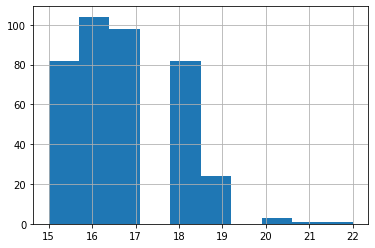

In [68]:
data.age.hist()

In [66]:
data.quantile(q=0.5)

age           17.0
Medu           3.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       4.0
G1            11.0
G2            11.0
Name: 0.5, dtype: float64

In [61]:
?data.describe 

In [ ]:
# YOUR CODE HERE

Какие значения принимает признак `guardian`?

In [69]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [70]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Чтобы получить все строки, которые удовлетворяют условию 

```table[condition]```

In [71]:
data[(data.guardian == 'mother')].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,12,12



Чтобы комбинировать условия:

* `&` --- and
* `|` --- or
* `~` --- not

In [79]:
#  (data.guardian == 'mother').values & (data.guardian == 'father').values

In [74]:
data[(data.guardian == 'mother') | (data.guardian == 'father')].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,NaN,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


---
**Задание 3**  
1. Выделим студентов младще 16 лет у которых опекуном является не мать

In [82]:
# YOUR CODE HERE
data[(data.age < 16) & (data.guardian != 'mother')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
11,GP,F,15,U,GT3,T,2,1,services,other,...,no,5,2,2,1,1,4,4,10,12
12,GP,M,15,U,LE3,T,4,4,health,services,...,no,4,3,3,1,3,5,2,14,14
14,GP,M,15,U,GT3,A,2,2,other,other,...,yes,4,5,2,1,1,3,0,14,16
21,GP,M,15,U,GT3,T,4,4,health,health,...,no,5,4,2,1,1,5,0,12,15
35,GP,F,15,U,GT3,T,2,3,other,other,...,no,3,5,1,1,1,5,0,8,7
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,yes,5,4,3,2,4,5,8,12,12
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,no,4,3,3,1,1,5,2,19,18
43,GP,M,15,U,GT3,T,2,2,services,services,...,no,5,4,1,1,1,1,0,8,8
49,GP,F,15,U,GT3,T,4,4,services,teacher,...,no,4,4,4,1,1,3,2,7,7
52,GP,M,15,U,LE3,A,4,2,health,health,...,no,5,5,5,3,4,5,6,11,11


2. Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [ ]:
# YOUR CODE HERE

---
Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

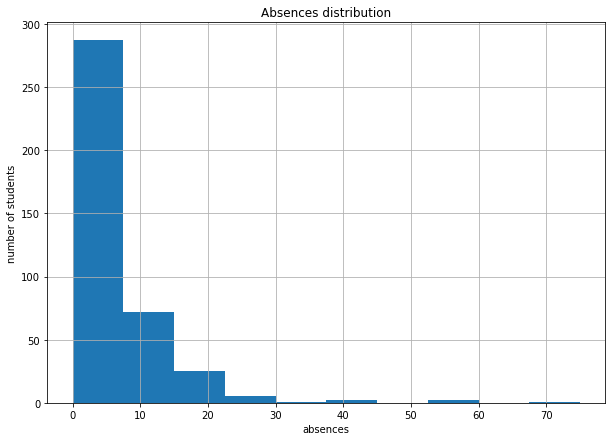

In [83]:
plt.figure(figsize=(10,7))
plt.title('Absences distribution')

data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

Мы можем считать разные статистки

In [84]:
data['absences'].mean()

5.708860759493671

In [85]:
data['absences'].std()

8.00309568710818

In [86]:
data['absences'].max()

75

---
**Задание 4** Разделите студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно **не** меньше среднего.

In [87]:
mean_absences = data['absences'].mean()
# YOUR CODE HERE
data[data.absences < mean_absences]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,NaN,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,12,12
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,0,6,5
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


---
**Задание 5**  Посчитайте среднее значение целевой переменной для каждой части.

In [ ]:

stud_few_absences_g3 = # YOUR CODE HERE
stud_many_absences_g3 = # YOUR CODE HERE

print('Students with few absences, mean G3: ', stud_few_absences_g3)
print('Students with many absences, mean G3:', stud_many_absences_g3)

Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже. Возможно, студенты, пропускавшие много занятий, знали материал очень хорошо :)

Также данные можно исследовать с помощью диаграммы рассеивания (scatter plot)

In [ ]:
plt.figure(figsize=(10,7))

data.plot.scatter(x = 'absences', y='G3')
plt.xlabel('absences')
plt.ylabel('Grade')
plt.show()

## 2. Линейная Регрессия

Поработаем с линейной регрессией на практике с помощью библиотеки [scikit-learn](https://scikit-learn.org/stable/). Эта библиотека включает в себя множество алгоритмов, разные тестовые наборов данных, функции для подсчета метрик и подбора параметров, а также многое другое.